<a href="https://colab.research.google.com/github/AddisonReyes/Proyecto-Clusterizacion/blob/main/Proyecto_Clusterizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Librerias y Dataset

Dataset: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/CC GENERAL.csv')
df.head(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

## Ingeniería de características

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.isna().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [ ]:
df = df.dropna()

In [ ]:
df.isna().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [ ]:
df['CUST_ID']

0       C10001
1       C10002
2       C10003
4       C10005
5       C10006
         ...  
8943    C19184
8945    C19186
8947    C19188
8948    C19189
8949    C19190
Name: CUST_ID, Length: 8636, dtype: object

In [ ]:
cust_id = []
for i in df['CUST_ID']:
  i = int(i[1:])
  cust_id.append(i)

df['CUST_ID'] = cust_id

<ipython-input-8-14e25c8b0a12>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CUST_ID'] = cust_id


In [ ]:
df.head(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    10001    40.900749           0.818182      95.40              0.00   
1    10002  3202.467416           0.909091       0.00              0.00   
2    10003  2495.148862           1.000000     773.17            773.17   
4    10005   817.714335           1.000000      16.00             16.00   
5    10006  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
4                    0.00                 0              1        1200.0   
5                    0.00                 0              8        1800.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   int64  
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHA

In [ ]:
df.describe()

CUST_ID       BALANCE  BALANCE_FREQUENCY     PURCHASES  \
count   8636.000000   8636.000000        8636.000000   8636.000000   
mean   14602.540875   1601.224893           0.895035   1025.433874   
std     2632.772750   2095.571300           0.207697   2167.107984   
min    10001.000000      0.000000           0.000000      0.000000   
25%    12337.750000    148.095189           0.909091     43.367500   
50%    14592.500000    916.855459           1.000000    375.405000   
75%    16885.250000   2105.195853           1.000000   1145.980000   
max    19190.000000  19043.138560           1.000000  49039.570000   

       ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count       8636.000000             8636.000000   8636.000000   
mean         604.901438              420.843533    994.175523   
std         1684.307803              917.245182   2121.458303   
min            0.000000                0.000000      0.000000   
25%            0.000000                0.000000      0.000000   
50%           44.995000               94.785000      0.000000   
75%          599.100000              484.147500   1132.385490   
max        40761.250000            22500.000000  47137.211760   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          8636.000000                 8636.000000   
mean              0.496000                    0.205909   
std               0.401273                    0.300054   
min               0.000000                    0.000000   
25%               0.083333                    0.000000   
50%               0.500000                    0.083333   
75%               0.916667                    0.333333   
max               1.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                       8636.000000             8636.000000   
mean                           0.368820                0.137604   
std                            0.398093                0.201791   
min                            0.000000                0.000000   
25%                            0.000000                0.000000   
50%                            0.166667                0.000000   
75%                            0.750000                0.250000   
max                            1.000000                1.500000   

       CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS  \
count       8636.000000    8636.000000   8636.000000   8636.000000   
mean           3.313918      15.033233   4522.091030   1784.478099   
std            6.912506      25.180468   3659.240379   2909.810090   
min            0.000000       0.000000     50.000000      0.049513   
25%            0.000000       1.000000   1600.000000    418.559237   
50%            0.000000       7.000000   3000.000000    896.675701   
75%            4.000000      18.000000   6500.000000   1951.142090   
max          123.000000     358.000000  30000.000000  50721.483360   

       MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count       8636.000000       8636.000000  8636.000000  
mean         864.304943          0.159304    11.534391  
std         2372.566350          0.296271     1.310984  
min            0.019163          0.000000     6.000000  
25%          169.163545          0.000000    12.000000  
50%          312.452292          0.000000    12.000000  
75%          825.496463          0.166667    12.000000  
max        76406.207520          1.000000    12.000000

## Análisis descriptivo de la data (EDA)

In [ ]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

<Figure size 576x396 with 0 Axes>

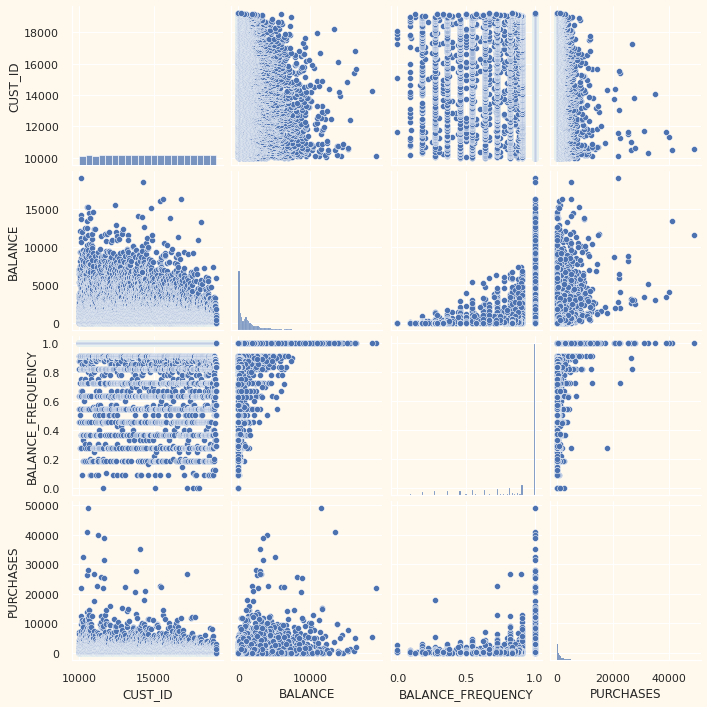

In [ ]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})

To_Plot = [ 'CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES' ]

plt.figure()
sns.pairplot(df[To_Plot])

plt.show()

<Figure size 576x396 with 0 Axes>

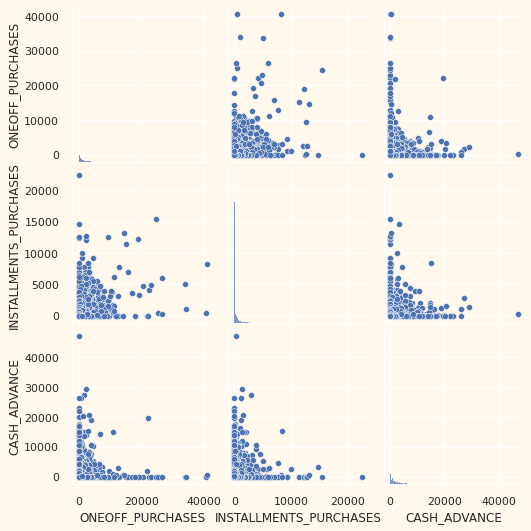

In [ ]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})

To_Plot = [ 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE' ]

plt.figure()
sns.pairplot(df[To_Plot])

plt.show()

<Figure size 576x396 with 0 Axes>

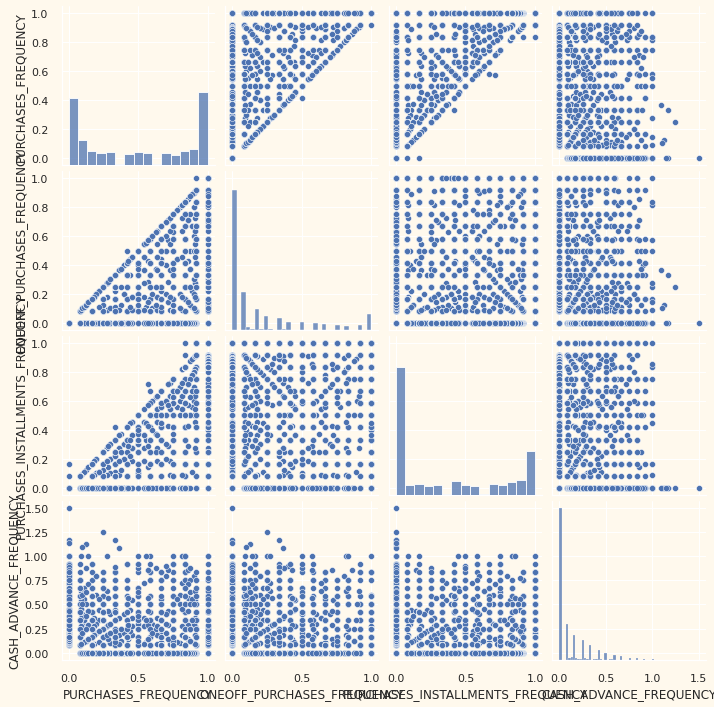

In [ ]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})

To_Plot = [ 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY' ]

plt.figure()
sns.pairplot(df[To_Plot])

plt.show()

<Figure size 576x396 with 0 Axes>

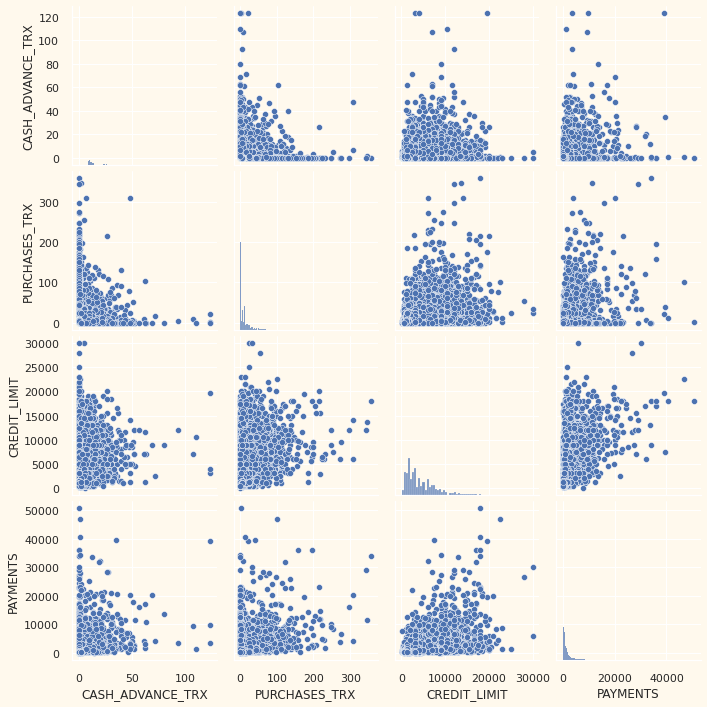

In [ ]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})

To_Plot = [ 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS' ]

plt.figure()
sns.pairplot(df[To_Plot])

plt.show()

<Figure size 576x396 with 0 Axes>

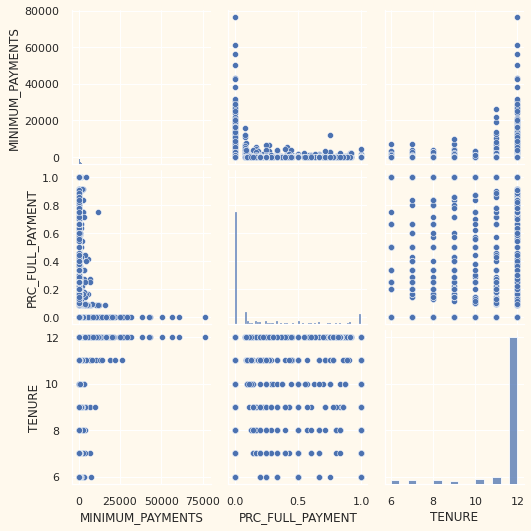

In [ ]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})

To_Plot = [ 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE' ]

plt.figure()
sns.pairplot(df[To_Plot])

plt.show()

<Axes: >

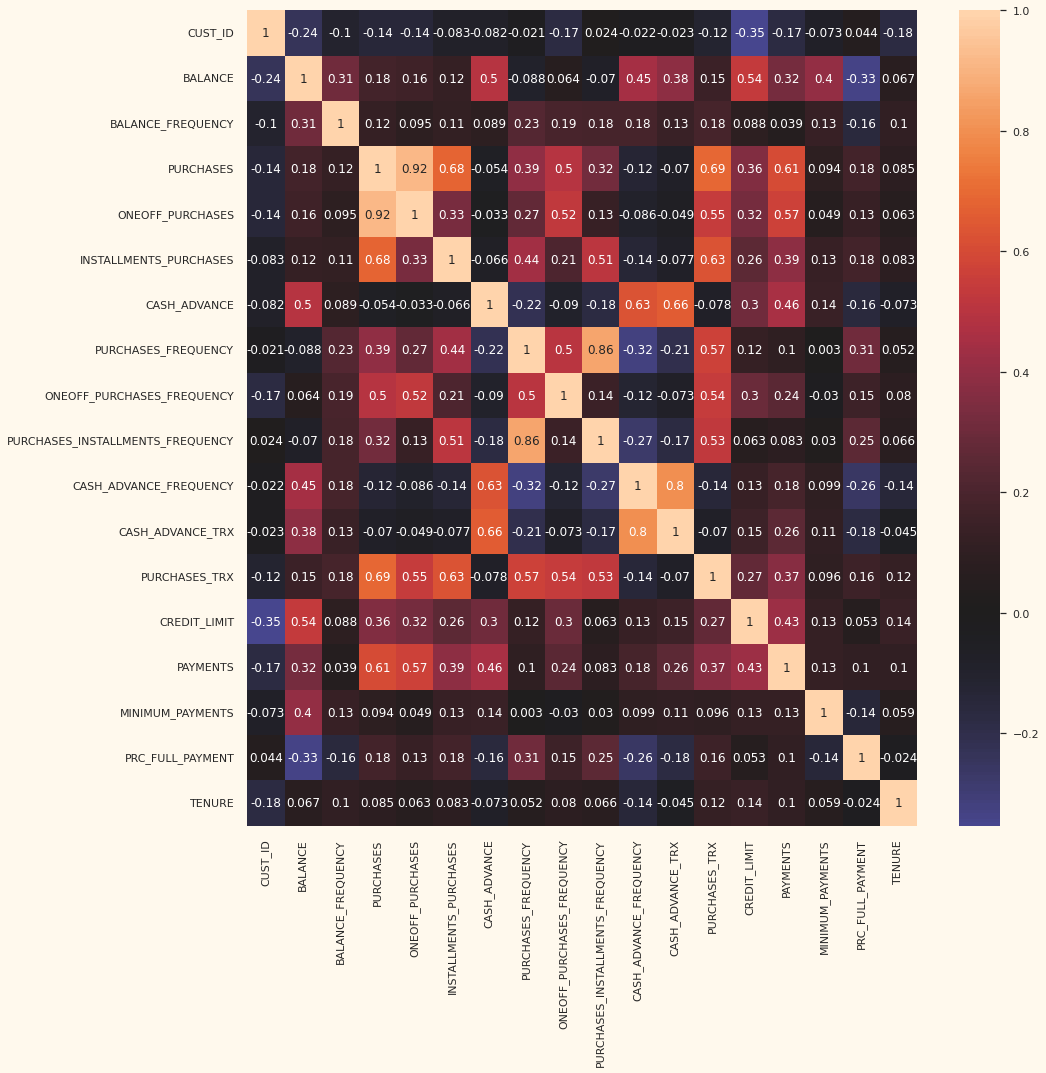

In [ ]:
corrmat= df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corrmat, annot=True, center=0)

##  Entrenamiento del modelo.

In [ ]:
ds = df.copy()

scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds), columns=ds.columns )

In [ ]:
scaled_ds.head(5)

CUST_ID   BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -1.747894 -0.744625          -0.370047  -0.429184         -0.359160   
1 -1.747514  0.764152           0.067679  -0.473208         -0.359160   
2 -1.747134  0.426602           0.505405  -0.116413          0.099909   
3 -1.746374 -0.373910           0.505405  -0.465825         -0.349660   
4 -1.745995  0.099551           0.505405   0.142062         -0.359160   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.354826     -0.468655            -0.820769   
1               -0.458839      2.568556            -1.236139   
2               -0.458839     -0.468655             1.256077   
3               -0.458839     -0.468655            -1.028455   
4                0.994815     -0.468655             0.425339   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.686280                         -0.717179   
1                   -0.686280                         -0.926522   
2                    2.646651                         -0.926522   
3                   -0.408536                         -0.926522   
4                   -0.686280                          0.538882   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.681953         -0.479437      -0.517623     -0.962575   
1                0.557022          0.099258      -0.597054      0.677204   
2               -0.681953         -0.479437      -0.120467      0.813852   
3               -0.681953         -0.479437      -0.557339     -0.907916   
4               -0.681953         -0.479437      -0.279329     -0.743938   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0 -0.543942         -0.305508         -0.537727  0.355181  
1  0.796852          0.087689          0.212380  0.355181  
2 -0.399503         -0.099906         -0.537727  0.355181  
3 -0.380165         -0.261131         -0.537727  0.355181  
4 -0.132119          0.650363         -0.537727  0.355181

In [ ]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1", "col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  8636.0 -1.316429e-17  2.161561 -2.952363 -1.464990 -0.465274  0.771716   
col2  8636.0  5.265717e-17  1.872302 -2.656806 -1.274295 -0.457024  0.767176   
col3  8636.0 -7.898576e-17  1.233420 -9.523007 -0.799949  0.042830  0.564734   

            max  
col1  29.231539  
col2  24.762281  
col3  15.321041

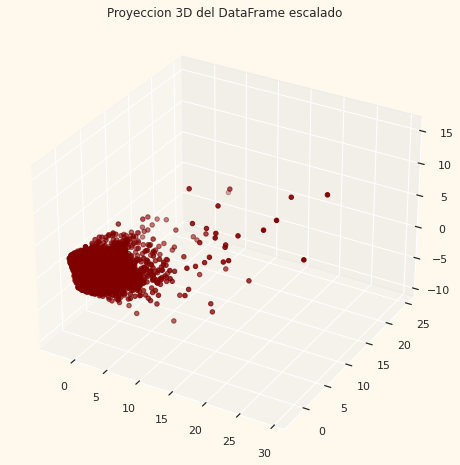

In [ ]:
x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("Proyeccion 3D del DataFrame escalado")
plt.show()

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78", "#7A9869","#F3AB60"]

## K-Means

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

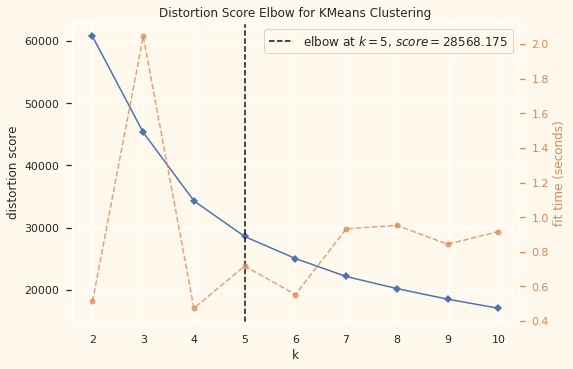

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [ ]:
KM = KMeans(n_clusters=5)

yhat_KM = KM.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_KM

df["Clusters"] = yhat_KM

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


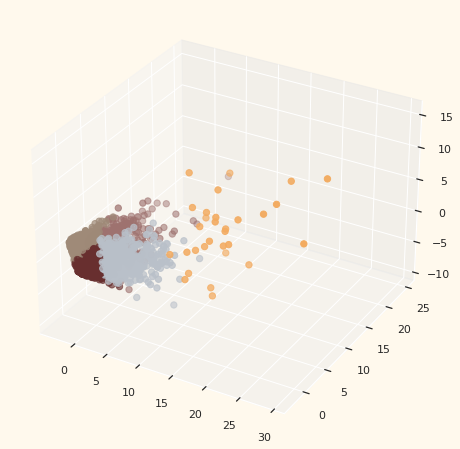

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
plt.show()

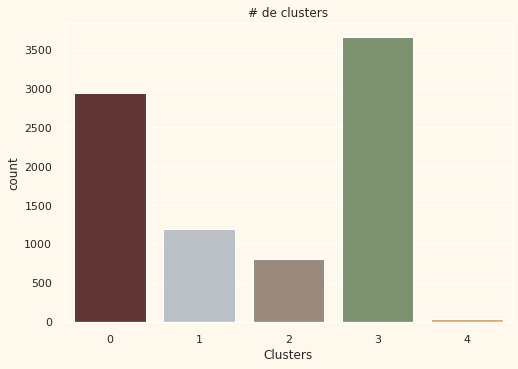

In [ ]:
pl = sns.countplot(x=df["Clusters"], palette=pal)
pl.set_title("# de clusters")
plt.show()

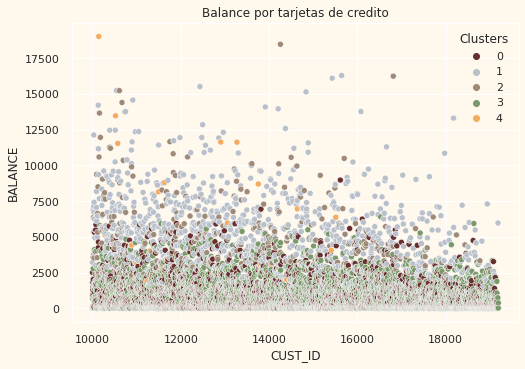

In [ ]:
pl = sns.scatterplot(df, x=df["CUST_ID"], y=df["BALANCE"], hue=df["Clusters"], palette=pal)
pl.set_title("Balance por tarjetas de credito")
plt.show()

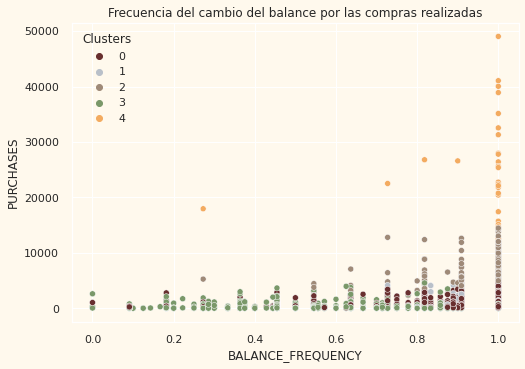

In [ ]:
pl = sns.scatterplot(df, x=df["BALANCE_FREQUENCY"], y=df["PURCHASES"], hue=df["Clusters"], palette=pal)
pl.set_title("Frecuencia del cambio del balance por las compras realizadas")
plt.show()

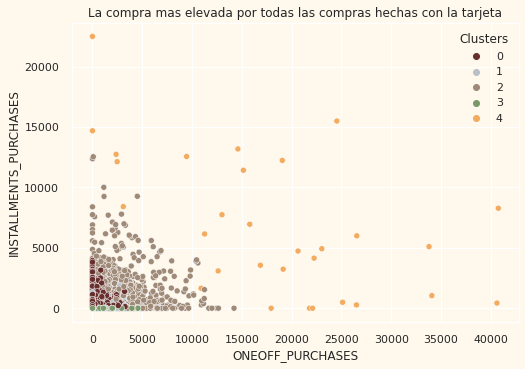

In [ ]:
pl = sns.scatterplot(df, x=df["ONEOFF_PURCHASES"], y=df["INSTALLMENTS_PURCHASES"], hue=df["Clusters"], palette=pal)
pl.set_title("La compra mas elevada por todas las compras hechas con la tarjeta")
plt.show()

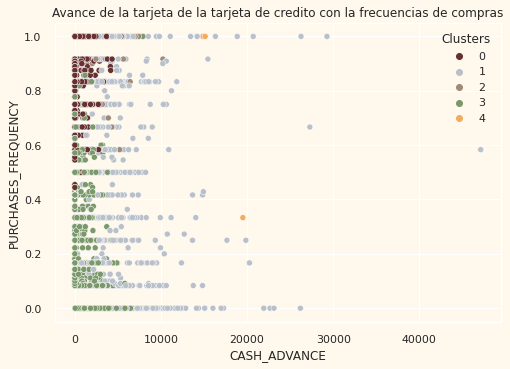

In [ ]:
pl = sns.scatterplot(df, x=df["CASH_ADVANCE"], y=df["PURCHASES_FREQUENCY"], hue=df["Clusters"], palette=pal)
pl.set_title("Avance de la tarjeta de la tarjeta de credito con la frecuencias de compras")
plt.show()

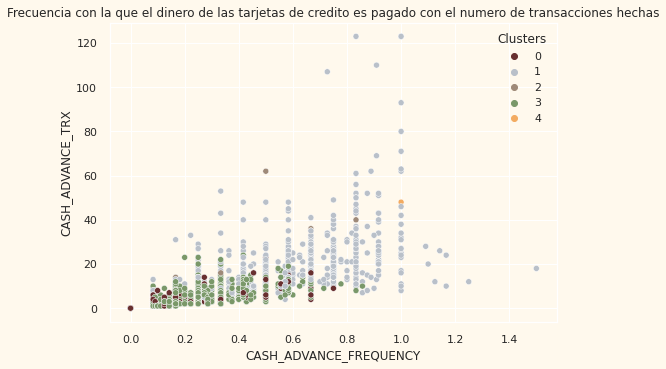

In [ ]:
pl = sns.scatterplot(df, x=df["CASH_ADVANCE_FREQUENCY"], y=df["CASH_ADVANCE_TRX"], hue=df["Clusters"], palette=pal)
pl.set_title("Frecuencia con la que el dinero de las tarjetas de credito es pagado con el numero de transacciones hechas")
plt.show()

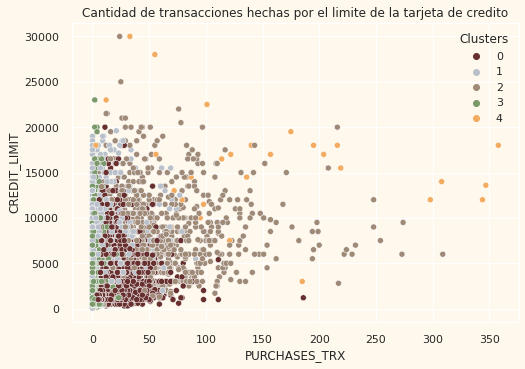

In [ ]:
pl = sns.scatterplot(df, x=df["PURCHASES_TRX"], y=df["CREDIT_LIMIT"], hue=df["Clusters"], palette=pal)
pl.set_title("Cantidad de transacciones hechas por el limite de la tarjeta de credito")
plt.show()

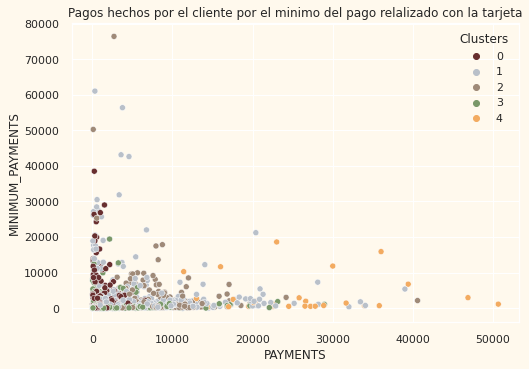

In [ ]:
pl = sns.scatterplot(df, x=df["PAYMENTS"], y=df["MINIMUM_PAYMENTS"], hue=df["Clusters"], palette=pal)
pl.set_title("Pagos hechos por el cliente por el minimo del pago relalizado con la tarjeta")
plt.show()

## Mean-shift

In [ ]:
MS = MeanShift(seeds=PCA_ds.sample(4).iloc[:, :-1].to_numpy(), bandwidth=0.01)

yhat_MS = MS.fit_predict(PCA_ds.iloc[:, :-1])

PCA_ds["Clusters"] = yhat_MS
df["Clusters"] = yhat_MS

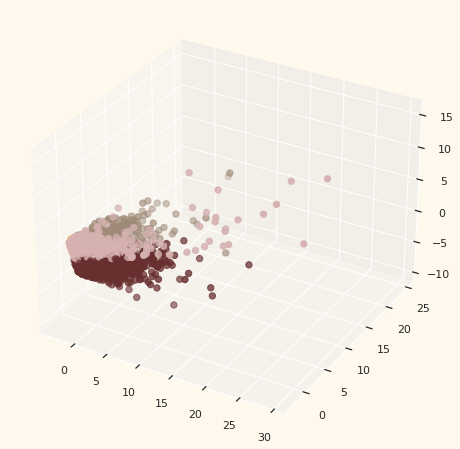

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
plt.show()

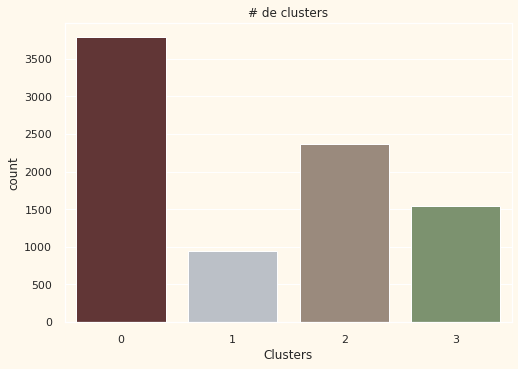

In [ ]:
pl = sns.countplot(x=df["Clusters"], palette=pal)
pl.set_title("# de clusters")
plt.show()

<ipython-input-38-c7d08736f3ac>:1: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  pl = sns.scatterplot(df, x=df["CUST_ID"], y=df["BALANCE"], hue=df["Clusters"], palette=pal)


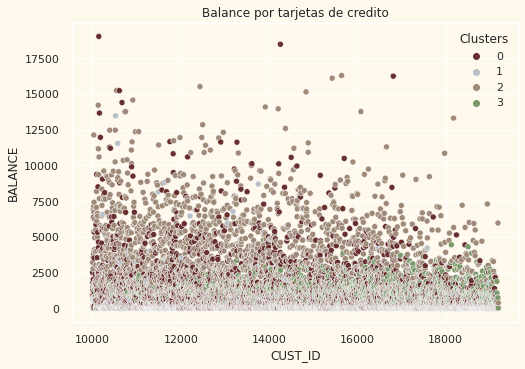

In [ ]:
pl = sns.scatterplot(df, x=df["CUST_ID"], y=df["BALANCE"], hue=df["Clusters"], palette=pal)
pl.set_title("Balance por tarjetas de credito")
plt.show()

<ipython-input-39-7eb4f67eec1a>:1: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  pl = sns.scatterplot(df, x=df["BALANCE_FREQUENCY"], y=df["PURCHASES"], hue=df["Clusters"], palette=pal)


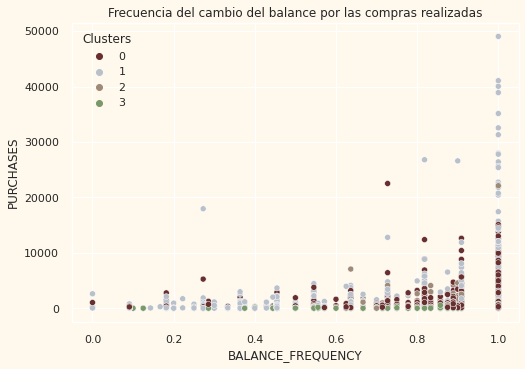

In [ ]:
pl = sns.scatterplot(df, x=df["BALANCE_FREQUENCY"], y=df["PURCHASES"], hue=df["Clusters"], palette=pal)
pl.set_title("Frecuencia del cambio del balance por las compras realizadas")
plt.show()

<ipython-input-40-c554f449c067>:1: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  pl = sns.scatterplot(df, x=df["ONEOFF_PURCHASES"], y=df["INSTALLMENTS_PURCHASES"], hue=df["Clusters"], palette=pal)


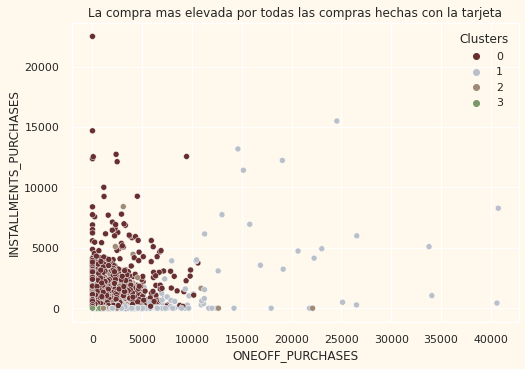

In [ ]:
pl = sns.scatterplot(df, x=df["ONEOFF_PURCHASES"], y=df["INSTALLMENTS_PURCHASES"], hue=df["Clusters"], palette=pal)
pl.set_title("La compra mas elevada por todas las compras hechas con la tarjeta")
plt.show()

<ipython-input-41-9cb5da36c895>:1: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  pl = sns.scatterplot(df, x=df["CASH_ADVANCE"], y=df["PURCHASES_FREQUENCY"], hue=df["Clusters"], palette=pal)


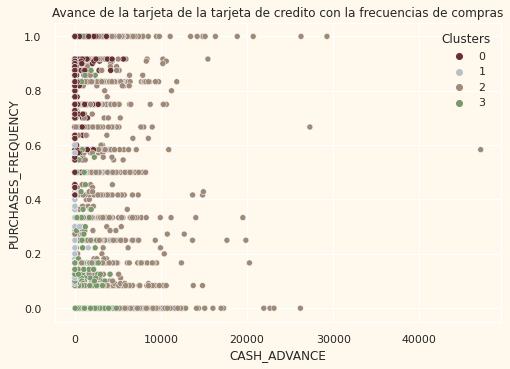

In [ ]:
pl = sns.scatterplot(df, x=df["CASH_ADVANCE"], y=df["PURCHASES_FREQUENCY"], hue=df["Clusters"], palette=pal)
pl.set_title("Avance de la tarjeta de la tarjeta de credito con la frecuencias de compras")
plt.show()

<ipython-input-42-6dbd8bc07af5>:1: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  pl = sns.scatterplot(df, x=df["CASH_ADVANCE_FREQUENCY"], y=df["CASH_ADVANCE_TRX"], hue=df["Clusters"], palette=pal)


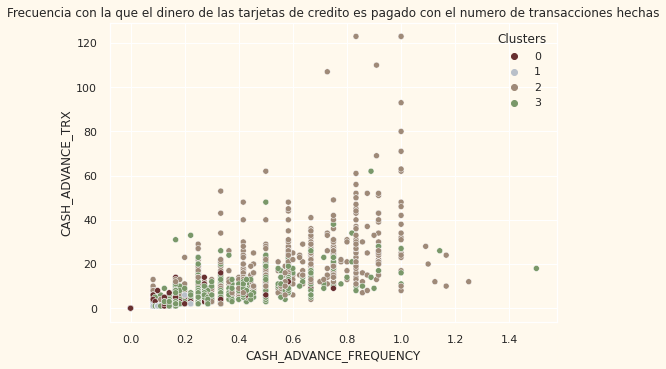

In [ ]:
pl = sns.scatterplot(df, x=df["CASH_ADVANCE_FREQUENCY"], y=df["CASH_ADVANCE_TRX"], hue=df["Clusters"], palette=pal)
pl.set_title("Frecuencia con la que el dinero de las tarjetas de credito es pagado con el numero de transacciones hechas")
plt.show()

<ipython-input-43-b3ea8c905d14>:1: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  pl = sns.scatterplot(df, x=df["PURCHASES_TRX"], y=df["CREDIT_LIMIT"], hue=df["Clusters"], palette=pal)


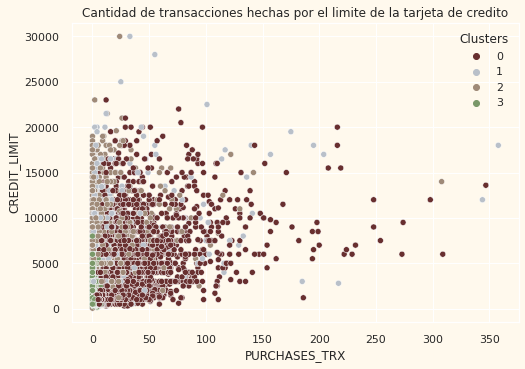

In [ ]:
pl = sns.scatterplot(df, x=df["PURCHASES_TRX"], y=df["CREDIT_LIMIT"], hue=df["Clusters"], palette=pal)
pl.set_title("Cantidad de transacciones hechas por el limite de la tarjeta de credito")
plt.show()

<ipython-input-44-d405571d52ad>:1: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  pl = sns.scatterplot(df, x=df["PAYMENTS"], y=df["MINIMUM_PAYMENTS"], hue=df["Clusters"], palette=pal)


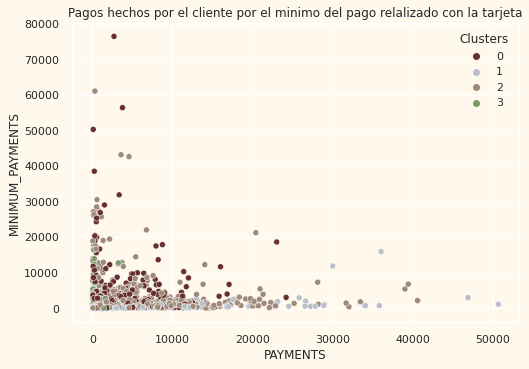

In [ ]:
pl = sns.scatterplot(df, x=df["PAYMENTS"], y=df["MINIMUM_PAYMENTS"], hue=df["Clusters"], palette=pal)
pl.set_title("Pagos hechos por el cliente por el minimo del pago relalizado con la tarjeta")
plt.show()

## Agglomerative clustering

In [ ]:
AC = AgglomerativeClustering(n_clusters=4)

yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

df["Clusters"] = yhat_AC

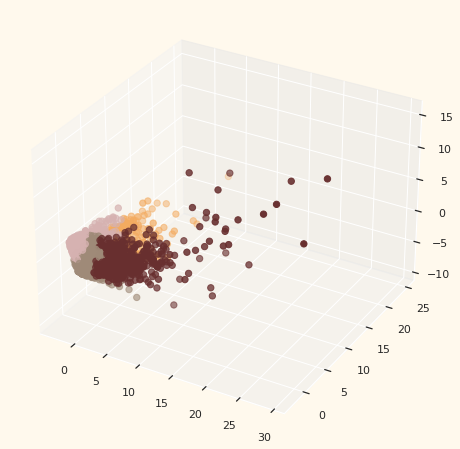

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
plt.show()

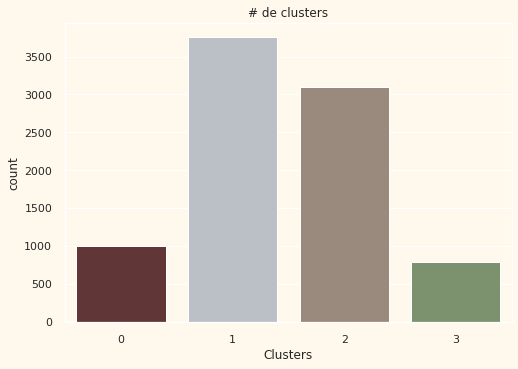

In [ ]:
pl = sns.countplot(x=df["Clusters"], palette=pal)
pl.set_title("# de clusters")
plt.show()

<ipython-input-48-c7d08736f3ac>:1: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  pl = sns.scatterplot(df, x=df["CUST_ID"], y=df["BALANCE"], hue=df["Clusters"], palette=pal)


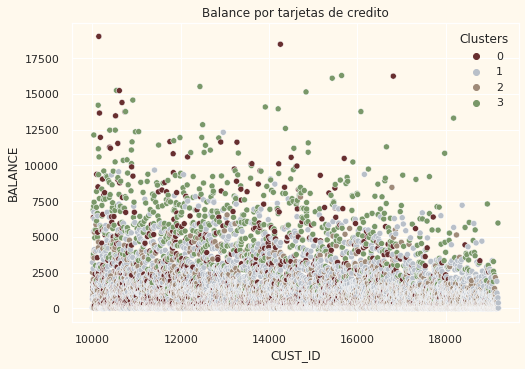

In [ ]:
pl = sns.scatterplot(df, x=df["CUST_ID"], y=df["BALANCE"], hue=df["Clusters"], palette=pal)
pl.set_title("Balance por tarjetas de credito")
plt.show()

<ipython-input-49-7eb4f67eec1a>:1: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  pl = sns.scatterplot(df, x=df["BALANCE_FREQUENCY"], y=df["PURCHASES"], hue=df["Clusters"], palette=pal)


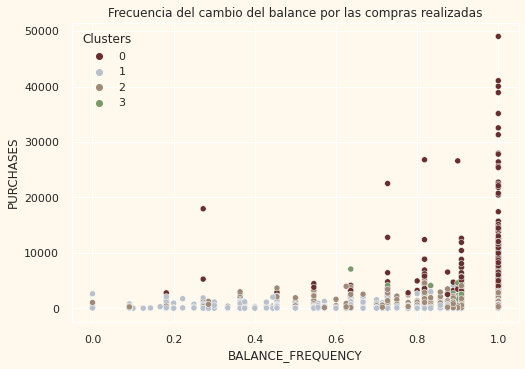

In [ ]:
pl = sns.scatterplot(df, x=df["BALANCE_FREQUENCY"], y=df["PURCHASES"], hue=df["Clusters"], palette=pal)
pl.set_title("Frecuencia del cambio del balance por las compras realizadas")
plt.show()

<ipython-input-50-c554f449c067>:1: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  pl = sns.scatterplot(df, x=df["ONEOFF_PURCHASES"], y=df["INSTALLMENTS_PURCHASES"], hue=df["Clusters"], palette=pal)


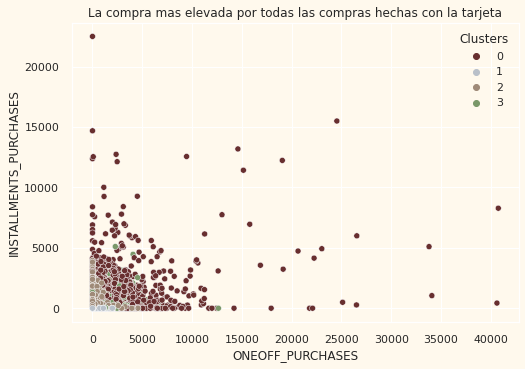

In [ ]:
pl = sns.scatterplot(df, x=df["ONEOFF_PURCHASES"], y=df["INSTALLMENTS_PURCHASES"], hue=df["Clusters"], palette=pal)
pl.set_title("La compra mas elevada por todas las compras hechas con la tarjeta")
plt.show()

<ipython-input-51-6dbd8bc07af5>:1: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  pl = sns.scatterplot(df, x=df["CASH_ADVANCE_FREQUENCY"], y=df["CASH_ADVANCE_TRX"], hue=df["Clusters"], palette=pal)


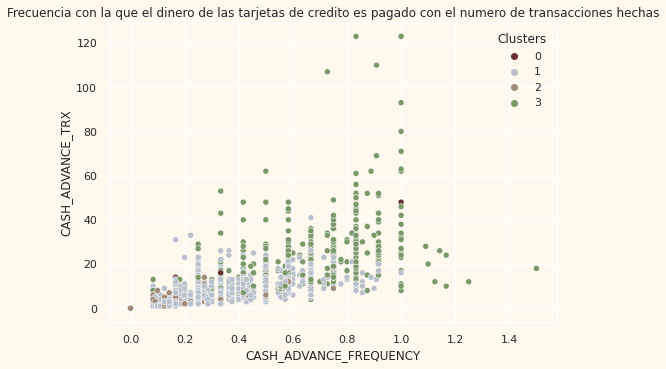

In [ ]:
pl = sns.scatterplot(df, x=df["CASH_ADVANCE_FREQUENCY"], y=df["CASH_ADVANCE_TRX"], hue=df["Clusters"], palette=pal)
pl.set_title("Frecuencia con la que el dinero de las tarjetas de credito es pagado con el numero de transacciones hechas")
plt.show()

<ipython-input-52-b3ea8c905d14>:1: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  pl = sns.scatterplot(df, x=df["PURCHASES_TRX"], y=df["CREDIT_LIMIT"], hue=df["Clusters"], palette=pal)


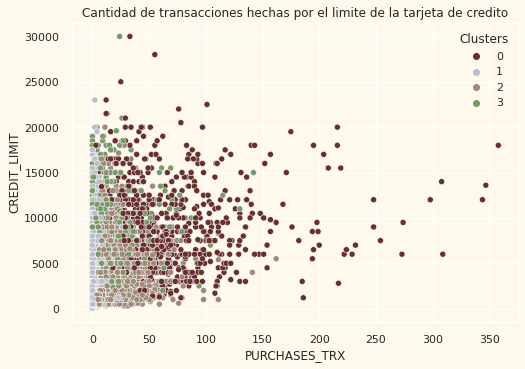

In [ ]:
pl = sns.scatterplot(df, x=df["PURCHASES_TRX"], y=df["CREDIT_LIMIT"], hue=df["Clusters"], palette=pal)
pl.set_title("Cantidad de transacciones hechas por el limite de la tarjeta de credito")
plt.show()

<ipython-input-53-d405571d52ad>:1: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  pl = sns.scatterplot(df, x=df["PAYMENTS"], y=df["MINIMUM_PAYMENTS"], hue=df["Clusters"], palette=pal)


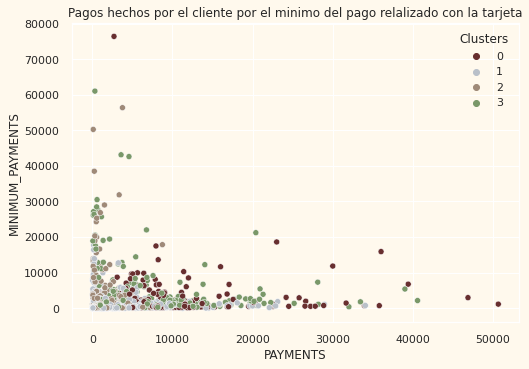

In [ ]:
pl = sns.scatterplot(df, x=df["PAYMENTS"], y=df["MINIMUM_PAYMENTS"], hue=df["Clusters"], palette=pal)
pl.set_title("Pagos hechos por el cliente por el minimo del pago relalizado con la tarjeta")
plt.show()

## DBSCAN

In [ ]:
DB = DBSCAN(eps=0.8, min_samples=15, leaf_size=50)

yhat_DB = DB.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_DB

df["Clusters"] = yhat_DB

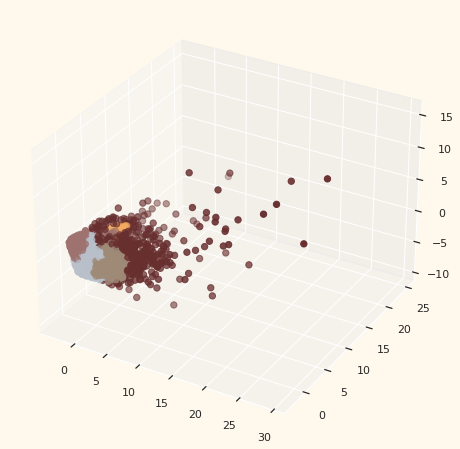

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
plt.show()

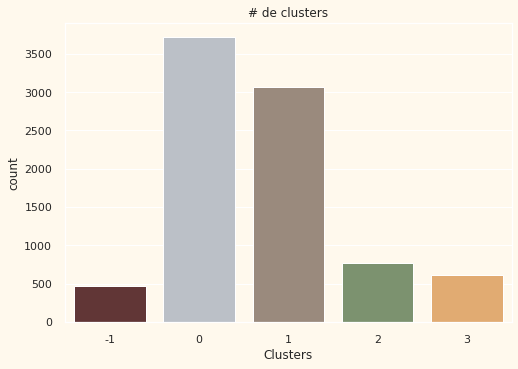

In [ ]:
pl = sns.countplot(x=df["Clusters"], palette=pal)
pl.set_title("# de clusters")
plt.show()

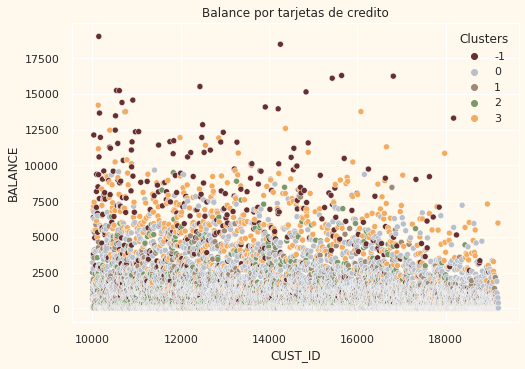

In [ ]:
pl = sns.scatterplot(df, x=df["CUST_ID"], y=df["BALANCE"], hue=df["Clusters"], palette=pal)
pl.set_title("Balance por tarjetas de credito")
plt.show()

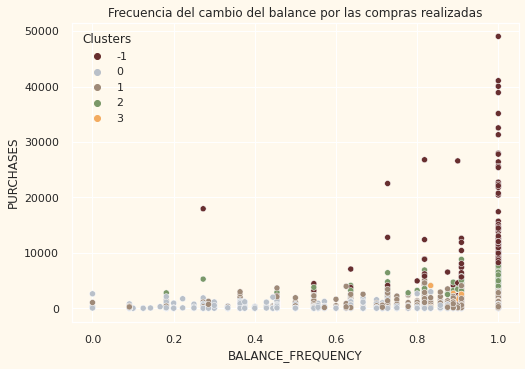

In [ ]:
pl = sns.scatterplot(df, x=df["BALANCE_FREQUENCY"], y=df["PURCHASES"], hue=df["Clusters"], palette=pal)
pl.set_title("Frecuencia del cambio del balance por las compras realizadas")
plt.show()

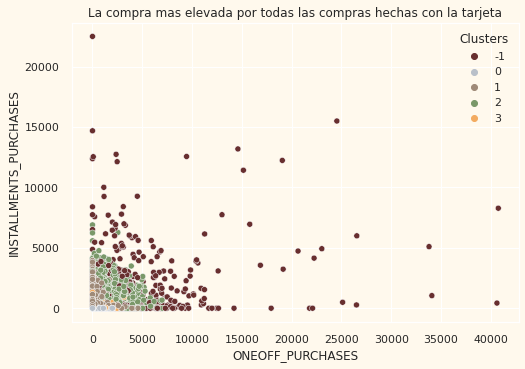

In [ ]:
pl = sns.scatterplot(df, x=df["ONEOFF_PURCHASES"], y=df["INSTALLMENTS_PURCHASES"], hue=df["Clusters"], palette=pal)
pl.set_title("La compra mas elevada por todas las compras hechas con la tarjeta")
plt.show()

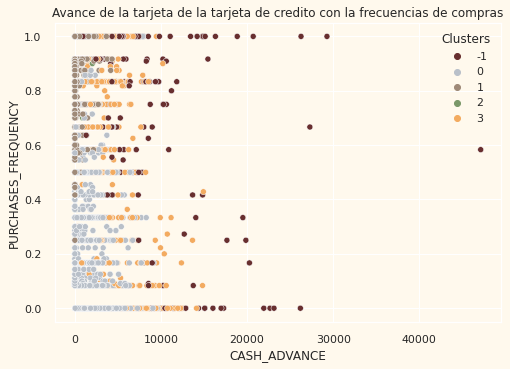

In [ ]:
pl = sns.scatterplot(df, x=df["CASH_ADVANCE"], y=df["PURCHASES_FREQUENCY"], hue=df["Clusters"], palette=pal)
pl.set_title("Avance de la tarjeta de la tarjeta de credito con la frecuencias de compras")
plt.show()

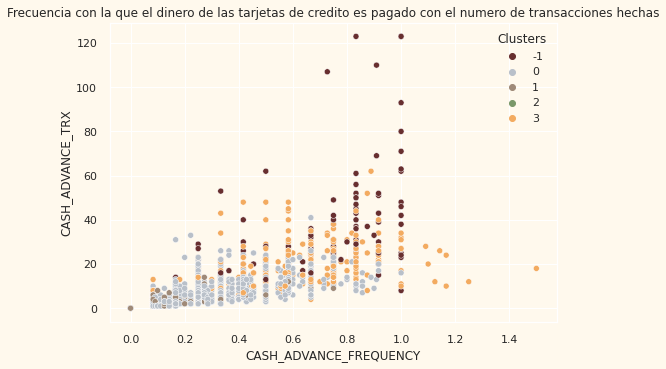

In [ ]:
pl = sns.scatterplot(df, x=df["CASH_ADVANCE_FREQUENCY"], y=df["CASH_ADVANCE_TRX"], hue=df["Clusters"], palette=pal)
pl.set_title("Frecuencia con la que el dinero de las tarjetas de credito es pagado con el numero de transacciones hechas")
plt.show()

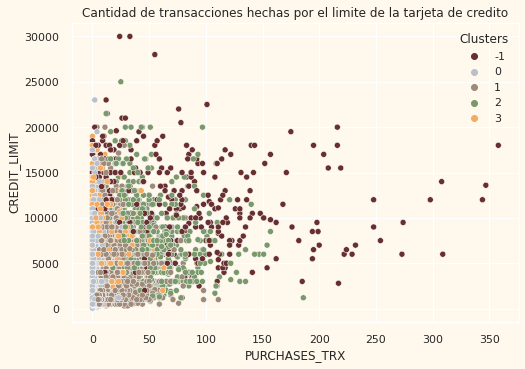

In [ ]:
pl = sns.scatterplot(df, x=df["PURCHASES_TRX"], y=df["CREDIT_LIMIT"], hue=df["Clusters"], palette=pal)
pl.set_title("Cantidad de transacciones hechas por el limite de la tarjeta de credito")
plt.show()

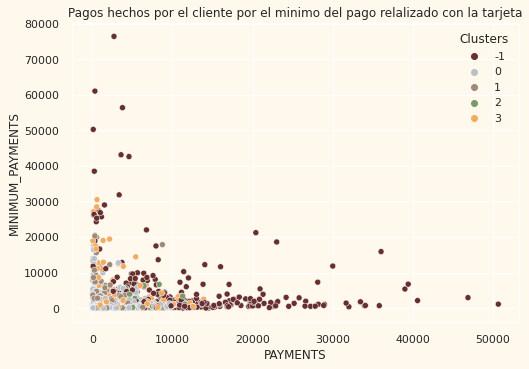

In [ ]:
pl = sns.scatterplot(df, x=df["PAYMENTS"], y=df["MINIMUM_PAYMENTS"], hue=df["Clusters"], palette=pal)
pl.set_title("Pagos hechos por el cliente por el minimo del pago relalizado con la tarjeta")
plt.show()

## OPTICS

In [ ]:
OP = OPTICS(min_samples=3, xi=0.5, max_eps=4, min_cluster_size=0.2)

yhat_OP = OP.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_OP

df["Clusters"] = yhat_OP

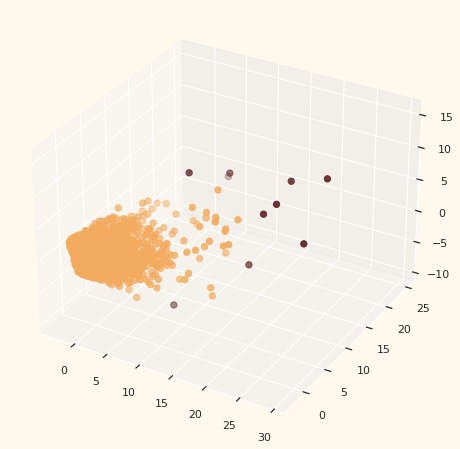

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
plt.show()

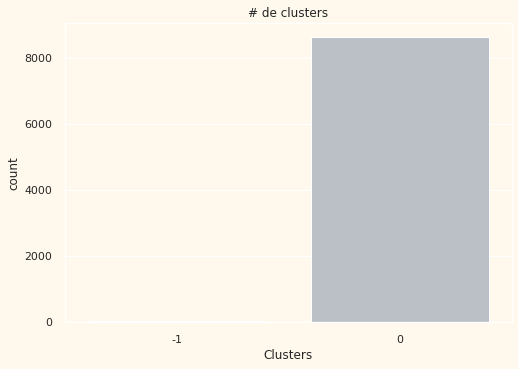

In [ ]:
pl = sns.countplot(x=df["Clusters"], palette=pal)
pl.set_title("# de clusters")
plt.show()

<ipython-input-67-c7d08736f3ac>:1: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  pl = sns.scatterplot(df, x=df["CUST_ID"], y=df["BALANCE"], hue=df["Clusters"], palette=pal)


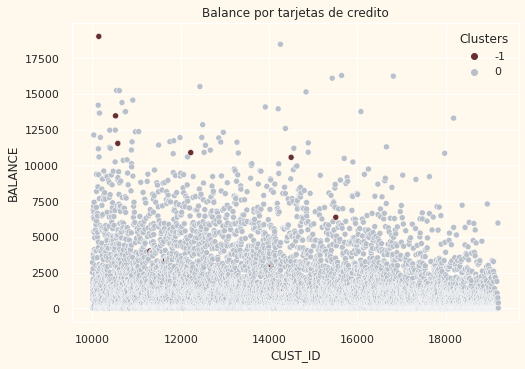

In [ ]:
pl = sns.scatterplot(df, x=df["CUST_ID"], y=df["BALANCE"], hue=df["Clusters"], palette=pal)
pl.set_title("Balance por tarjetas de credito")
plt.show()

<ipython-input-68-7eb4f67eec1a>:1: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  pl = sns.scatterplot(df, x=df["BALANCE_FREQUENCY"], y=df["PURCHASES"], hue=df["Clusters"], palette=pal)


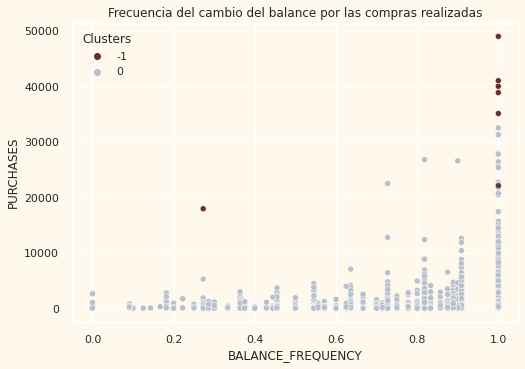

In [ ]:
pl = sns.scatterplot(df, x=df["BALANCE_FREQUENCY"], y=df["PURCHASES"], hue=df["Clusters"], palette=pal)
pl.set_title("Frecuencia del cambio del balance por las compras realizadas")
plt.show()

<ipython-input-69-c554f449c067>:1: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  pl = sns.scatterplot(df, x=df["ONEOFF_PURCHASES"], y=df["INSTALLMENTS_PURCHASES"], hue=df["Clusters"], palette=pal)


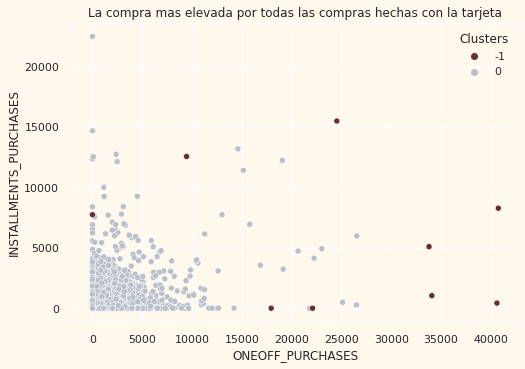

In [ ]:
pl = sns.scatterplot(df, x=df["ONEOFF_PURCHASES"], y=df["INSTALLMENTS_PURCHASES"], hue=df["Clusters"], palette=pal)
pl.set_title("La compra mas elevada por todas las compras hechas con la tarjeta")
plt.show()

<ipython-input-70-9cb5da36c895>:1: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  pl = sns.scatterplot(df, x=df["CASH_ADVANCE"], y=df["PURCHASES_FREQUENCY"], hue=df["Clusters"], palette=pal)


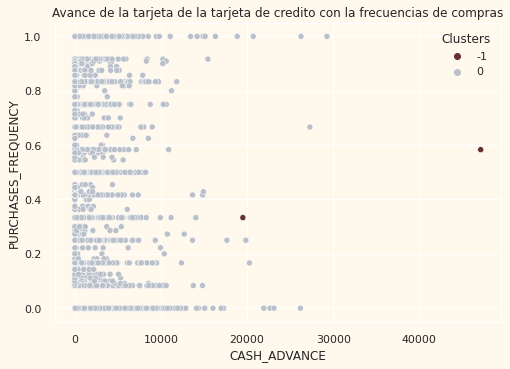

In [ ]:
pl = sns.scatterplot(df, x=df["CASH_ADVANCE"], y=df["PURCHASES_FREQUENCY"], hue=df["Clusters"], palette=pal)
pl.set_title("Avance de la tarjeta de la tarjeta de credito con la frecuencias de compras")
plt.show()

<ipython-input-71-6dbd8bc07af5>:1: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  pl = sns.scatterplot(df, x=df["CASH_ADVANCE_FREQUENCY"], y=df["CASH_ADVANCE_TRX"], hue=df["Clusters"], palette=pal)


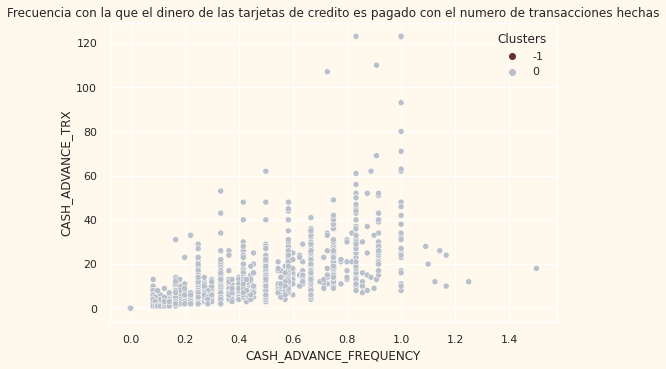

In [ ]:
pl = sns.scatterplot(df, x=df["CASH_ADVANCE_FREQUENCY"], y=df["CASH_ADVANCE_TRX"], hue=df["Clusters"], palette=pal)
pl.set_title("Frecuencia con la que el dinero de las tarjetas de credito es pagado con el numero de transacciones hechas")
plt.show()

<ipython-input-72-b3ea8c905d14>:1: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  pl = sns.scatterplot(df, x=df["PURCHASES_TRX"], y=df["CREDIT_LIMIT"], hue=df["Clusters"], palette=pal)


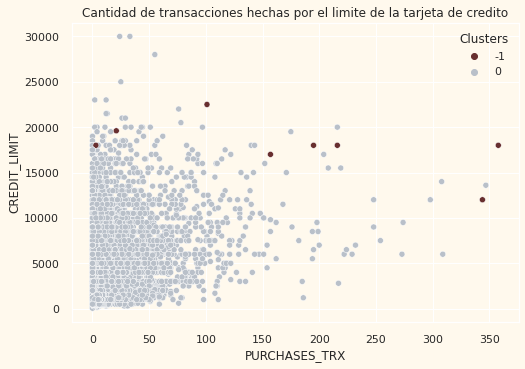

In [ ]:
pl = sns.scatterplot(df, x=df["PURCHASES_TRX"], y=df["CREDIT_LIMIT"], hue=df["Clusters"], palette=pal)
pl.set_title("Cantidad de transacciones hechas por el limite de la tarjeta de credito")
plt.show()

<ipython-input-73-d7d7af6ab03d>:1: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  pl = sns.scatterplot(df, x=df["PAYMENTS"], y=df["MINIMUM_PAYMENTS"], hue=df["Clusters"], palette=pal)


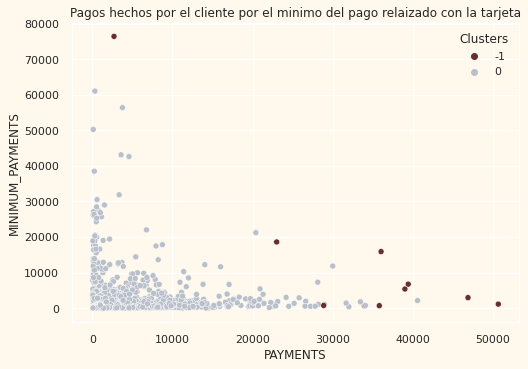

In [ ]:
pl = sns.scatterplot(df, x=df["PAYMENTS"], y=df["MINIMUM_PAYMENTS"], hue=df["Clusters"], palette=pal)
pl.set_title("Pagos hechos por el cliente por el minimo del pago relaizado con la tarjeta")
plt.show()

## Gaussian mixtures

In [ ]:
GM = GaussianMixture(n_components=4)

yhat_GM = GM.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_GM

df["Clusters"] = yhat_GM

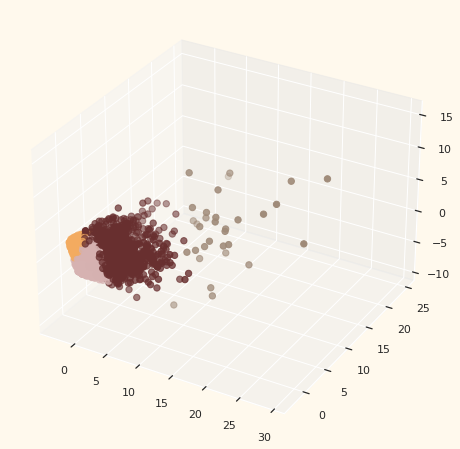

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
plt.show()

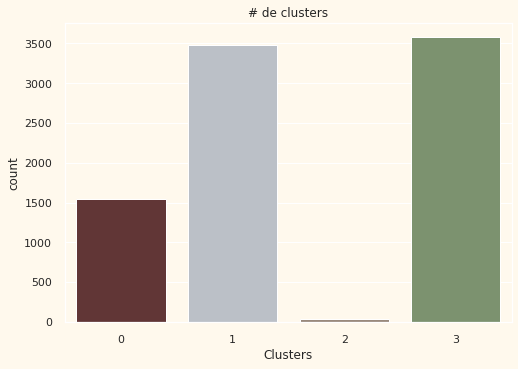

In [ ]:
pl = sns.countplot(x=df["Clusters"], palette=pal)
pl.set_title("# de clusters")
plt.show()

<ipython-input-77-c7d08736f3ac>:1: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  pl = sns.scatterplot(df, x=df["CUST_ID"], y=df["BALANCE"], hue=df["Clusters"], palette=pal)


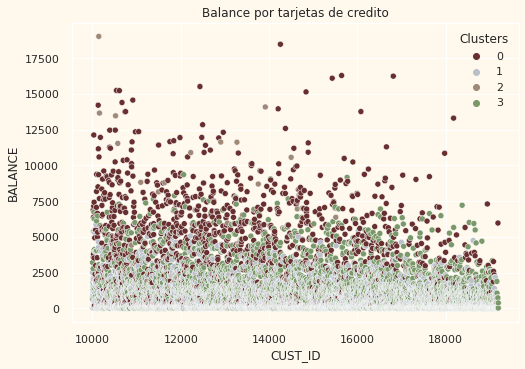

In [ ]:
pl = sns.scatterplot(df, x=df["CUST_ID"], y=df["BALANCE"], hue=df["Clusters"], palette=pal)
pl.set_title("Balance por tarjetas de credito")
plt.show()

<ipython-input-78-7eb4f67eec1a>:1: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  pl = sns.scatterplot(df, x=df["BALANCE_FREQUENCY"], y=df["PURCHASES"], hue=df["Clusters"], palette=pal)


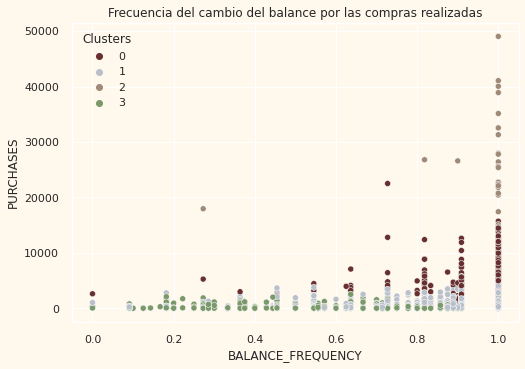

In [ ]:
pl = sns.scatterplot(df, x=df["BALANCE_FREQUENCY"], y=df["PURCHASES"], hue=df["Clusters"], palette=pal)
pl.set_title("Frecuencia del cambio del balance por las compras realizadas")
plt.show()

<ipython-input-79-c554f449c067>:1: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  pl = sns.scatterplot(df, x=df["ONEOFF_PURCHASES"], y=df["INSTALLMENTS_PURCHASES"], hue=df["Clusters"], palette=pal)


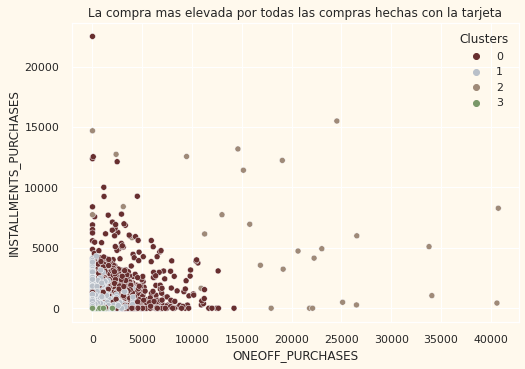

In [ ]:
pl = sns.scatterplot(df, x=df["ONEOFF_PURCHASES"], y=df["INSTALLMENTS_PURCHASES"], hue=df["Clusters"], palette=pal)
pl.set_title("La compra mas elevada por todas las compras hechas con la tarjeta")
plt.show()

<ipython-input-80-9cb5da36c895>:1: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  pl = sns.scatterplot(df, x=df["CASH_ADVANCE"], y=df["PURCHASES_FREQUENCY"], hue=df["Clusters"], palette=pal)


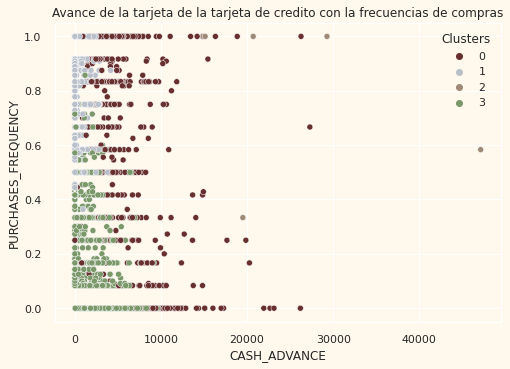

In [ ]:
pl = sns.scatterplot(df, x=df["CASH_ADVANCE"], y=df["PURCHASES_FREQUENCY"], hue=df["Clusters"], palette=pal)
pl.set_title("Avance de la tarjeta de la tarjeta de credito con la frecuencias de compras")
plt.show()

<ipython-input-81-6dbd8bc07af5>:1: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  pl = sns.scatterplot(df, x=df["CASH_ADVANCE_FREQUENCY"], y=df["CASH_ADVANCE_TRX"], hue=df["Clusters"], palette=pal)


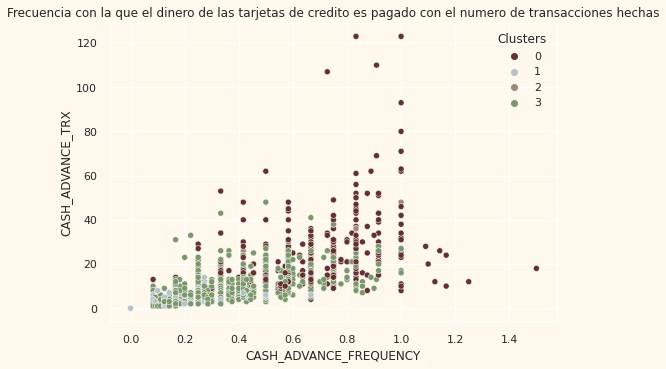

In [ ]:
pl = sns.scatterplot(df, x=df["CASH_ADVANCE_FREQUENCY"], y=df["CASH_ADVANCE_TRX"], hue=df["Clusters"], palette=pal)
pl.set_title("Frecuencia con la que el dinero de las tarjetas de credito es pagado con el numero de transacciones hechas")
plt.show()

<ipython-input-82-b3ea8c905d14>:1: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  pl = sns.scatterplot(df, x=df["PURCHASES_TRX"], y=df["CREDIT_LIMIT"], hue=df["Clusters"], palette=pal)


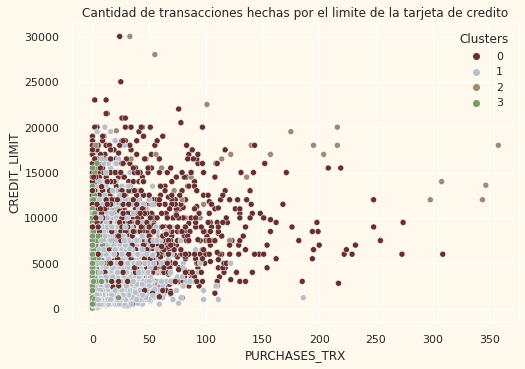

In [ ]:
pl = sns.scatterplot(df, x=df["PURCHASES_TRX"], y=df["CREDIT_LIMIT"], hue=df["Clusters"], palette=pal)
pl.set_title("Cantidad de transacciones hechas por el limite de la tarjeta de credito")
plt.show()

<ipython-input-83-d7d7af6ab03d>:1: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  pl = sns.scatterplot(df, x=df["PAYMENTS"], y=df["MINIMUM_PAYMENTS"], hue=df["Clusters"], palette=pal)


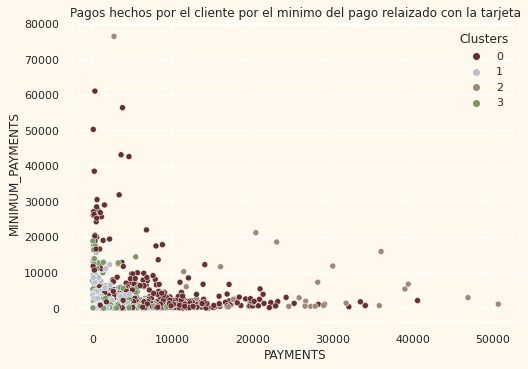

In [ ]:
pl = sns.scatterplot(df, x=df["PAYMENTS"], y=df["MINIMUM_PAYMENTS"], hue=df["Clusters"], palette=pal)
pl.set_title("Pagos hechos por el cliente por el minimo del pago relaizado con la tarjeta")
plt.show()

## Conclusiones

In [ ]:
#Mejor modelo seleccionado: Gaussian mixtures
col = [ "BALANCE_FREQUENCY", "PURCHASES", "ONEOFF_PURCHASES", 
        "INSTALLMENTS_PURCHASES", "PURCHASES_FREQUENCY", "CASH_ADVANCE",
        "ONEOFF_PURCHASES_FREQUENCY", "PURCHASES_INSTALLMENTS_FREQUENCY",
        "CASH_ADVANCE_FREQUENCY", "CASH_ADVANCE_TRX", "PURCHASES_TRX",
        "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", "PRC_FULL_PAYMENT",
        "TENURE"]

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 576x396 with 0 Axes>

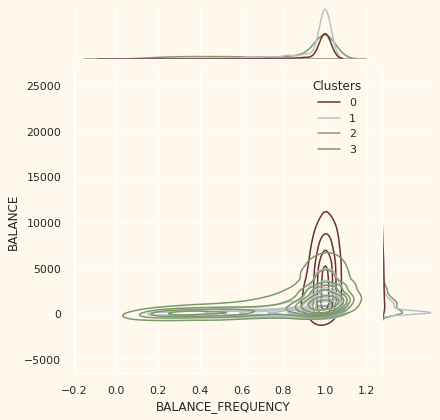

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 576x396 with 0 Axes>

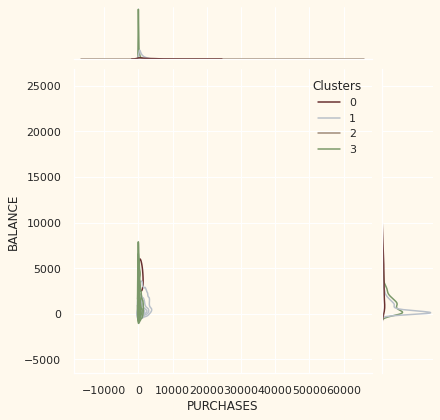

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 576x396 with 0 Axes>

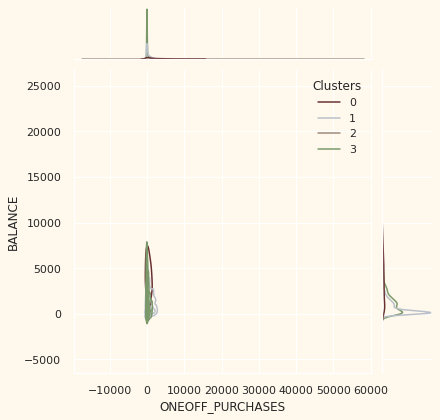

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 576x396 with 0 Axes>

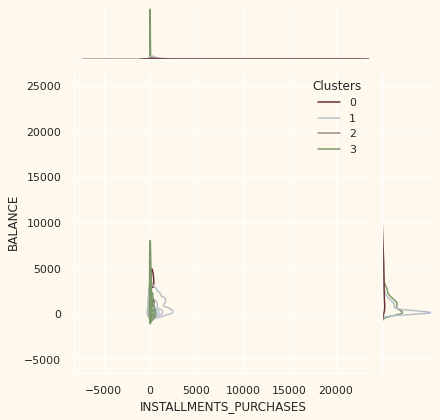

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 576x396 with 0 Axes>

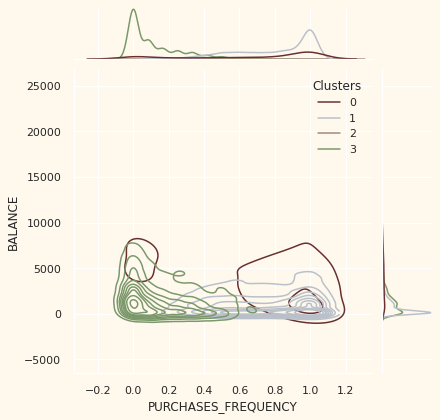

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 576x396 with 0 Axes>

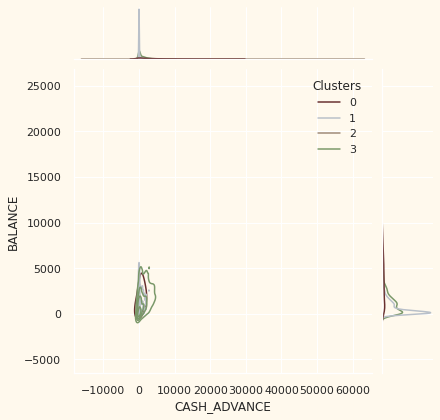

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 576x396 with 0 Axes>

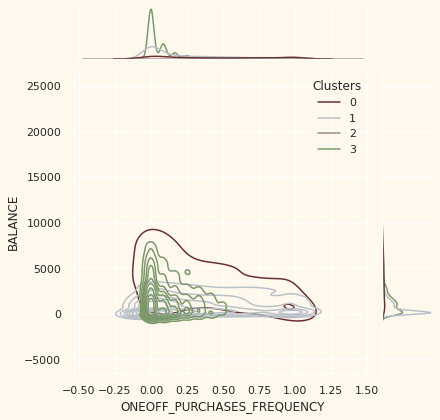

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 576x396 with 0 Axes>

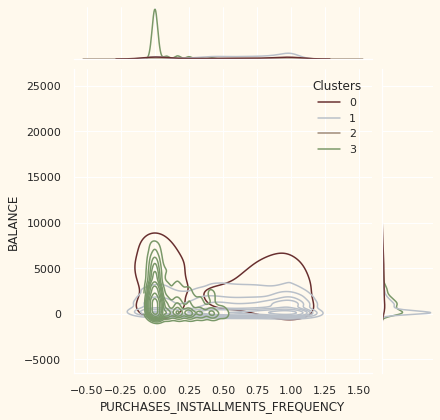

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 576x396 with 0 Axes>

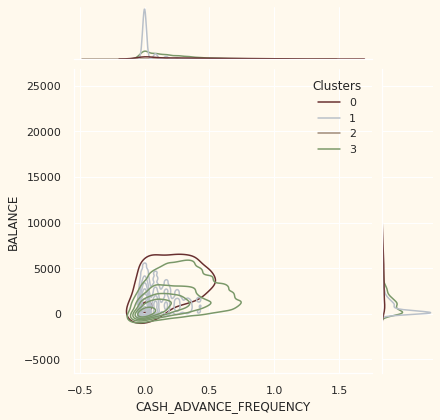

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 576x396 with 0 Axes>

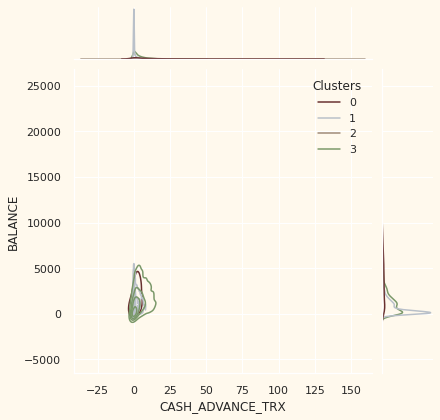

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 576x396 with 0 Axes>

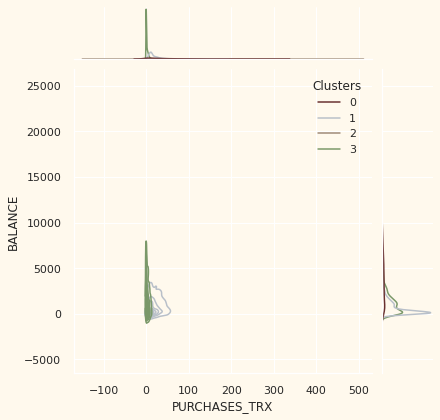

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 576x396 with 0 Axes>

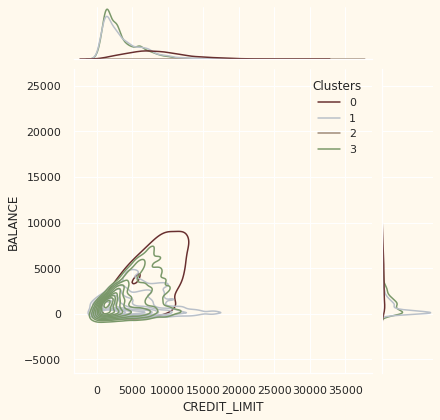

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 576x396 with 0 Axes>

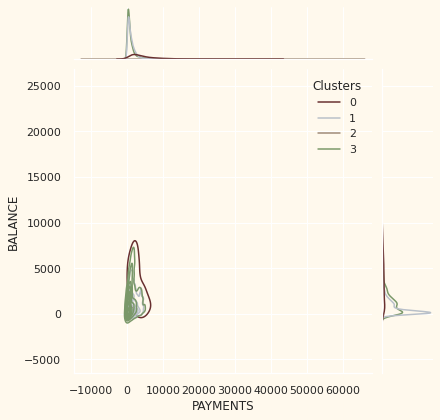

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 576x396 with 0 Axes>

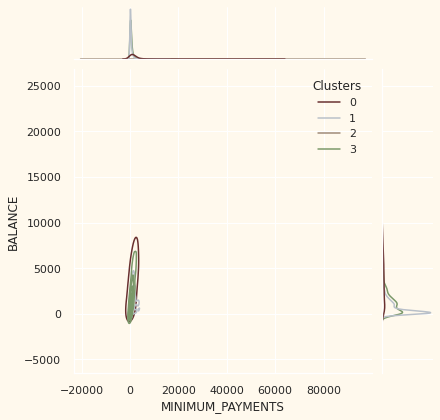

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 576x396 with 0 Axes>

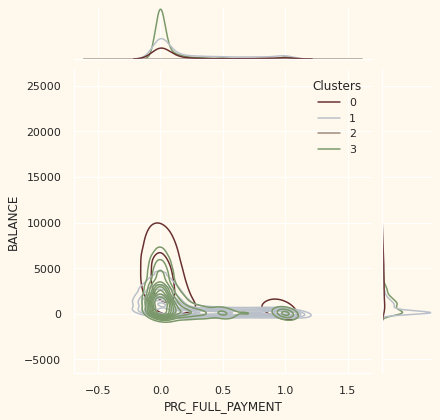

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 576x396 with 0 Axes>

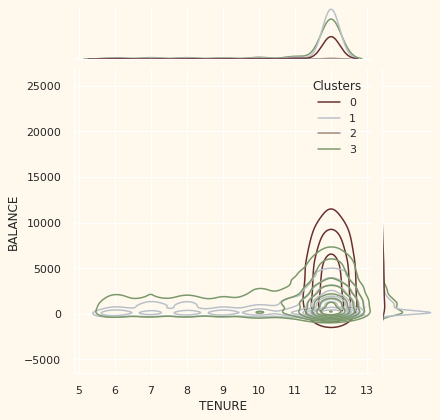

In [ ]:
for i in col:
    plt.figure()
    sns.jointplot(x=df[i], y=df["BALANCE"], hue=df["Clusters"], kind="kde", palette=pal)
    plt.show()

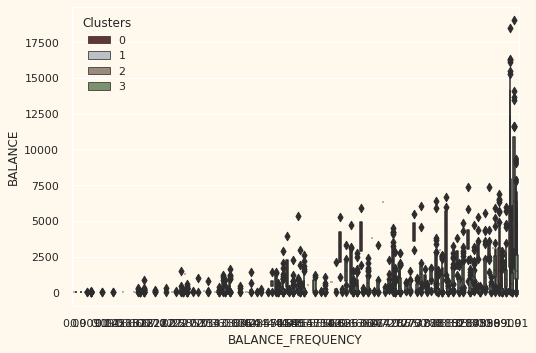

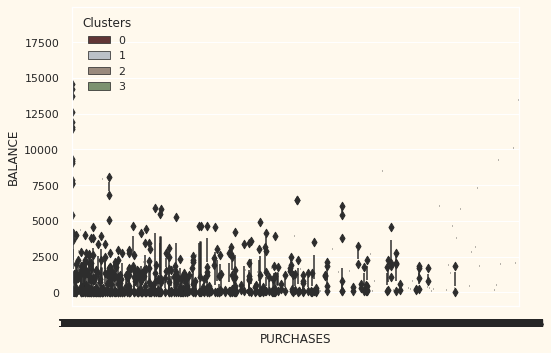

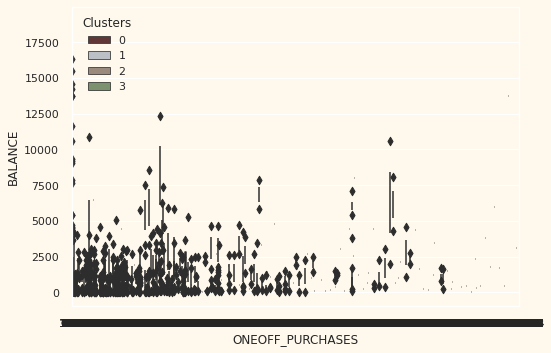

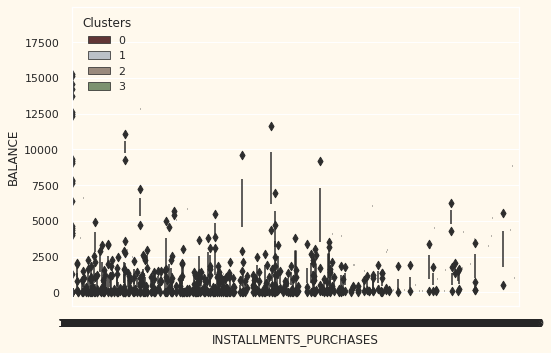

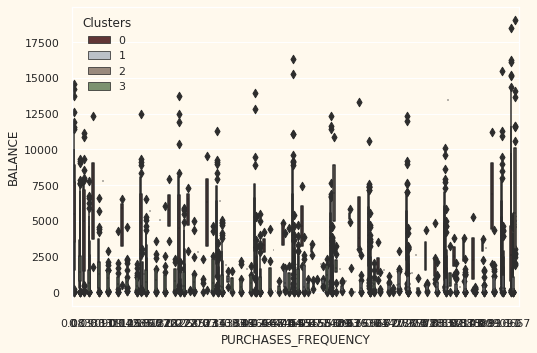

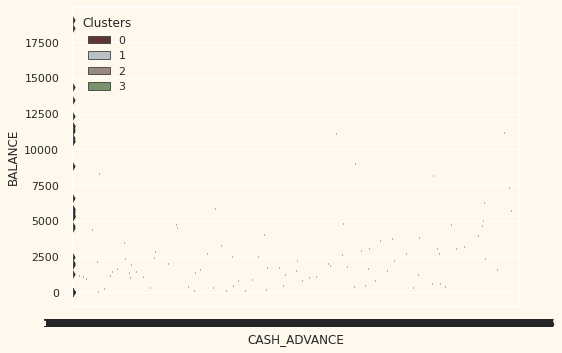

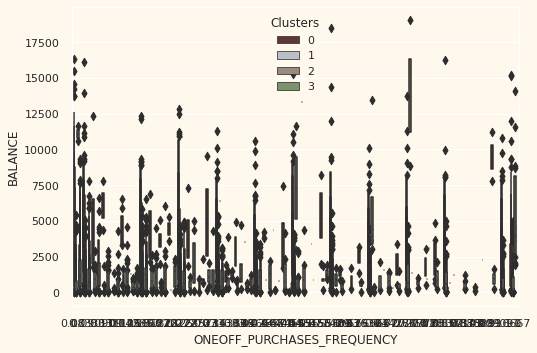

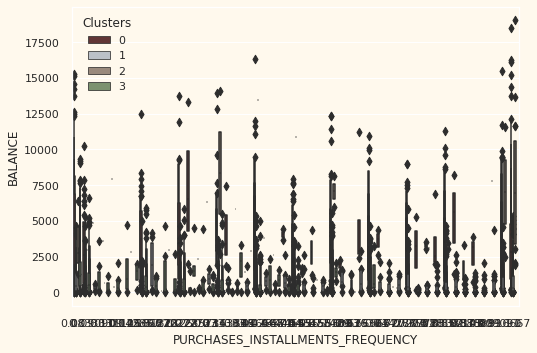

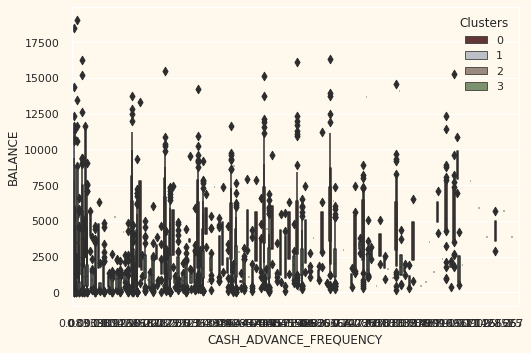

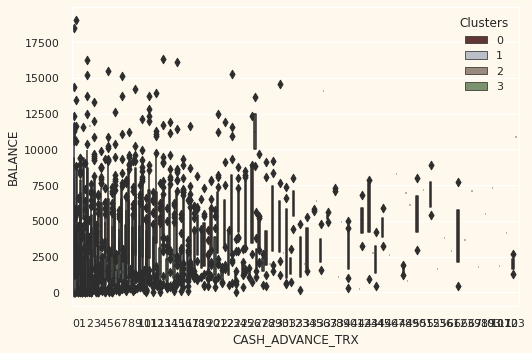

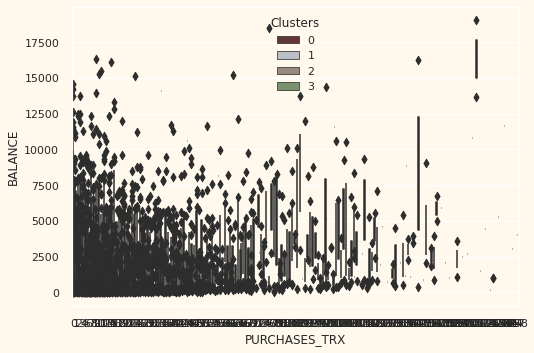

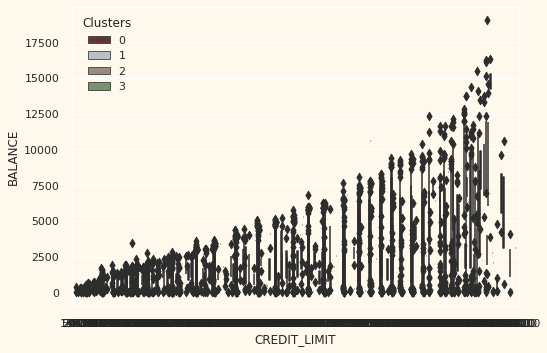

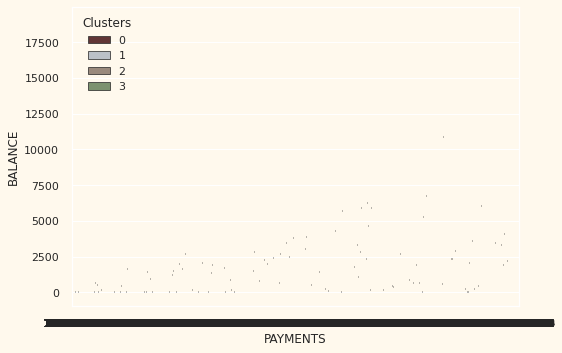

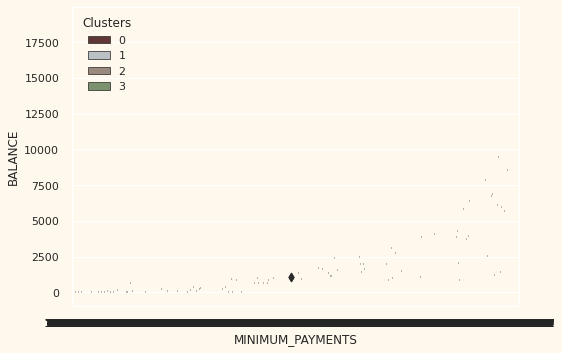

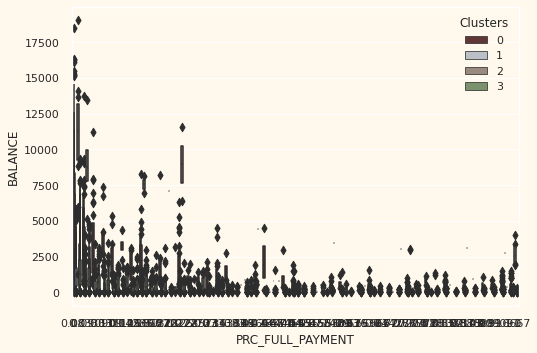

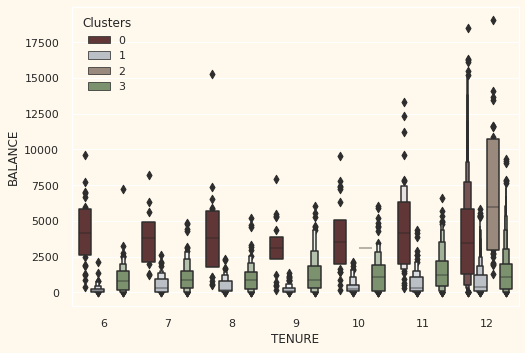

In [ ]:
for i in col:
    plt.figure()
    sns.boxenplot(x=df[i], y=df["BALANCE"], hue=df["Clusters"], palette=pal)
    plt.show()